In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


data = pd.read_excel(r"C:\Users\12919\Desktop\24能源经济\results\IMFs_decomposed_ceemdan_full.xlsx",index_col=0,header=0)




c:\Users\12919\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\12919\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\12919\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\12919\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters

RMSE: 22.798266292773196


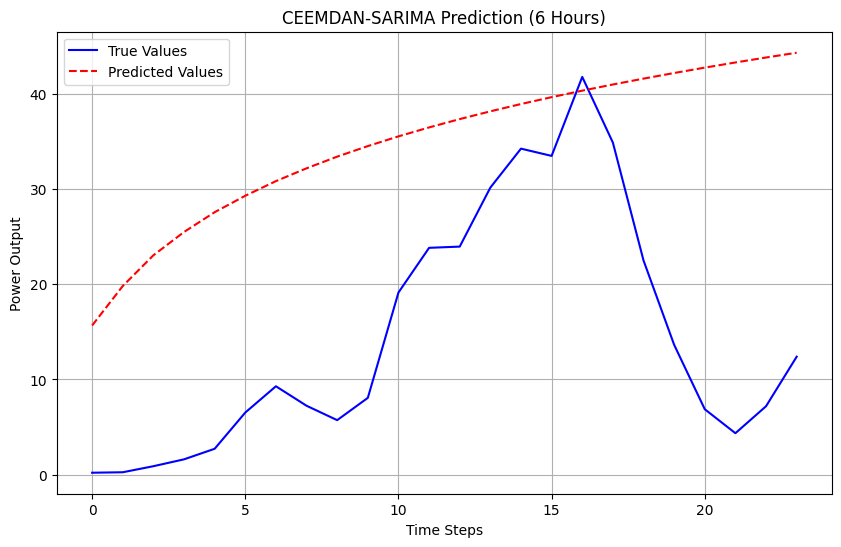

In [3]:


# 提取 IMF 分量和原始信号
imf_columns = [f"IMF {i}" for i in range(1, 17)]
imfs = data[imf_columns]
original_signal = data["Original Signal"]

# 2. 定义 SARIMA 模型参数
# 这里假设 SARIMA 参数为 (p, d, q) x (P, D, Q, s)
# 需要根据数据的特性进行调整
order = (1, 1, 2)  # (p, d, q)
seasonal_order = (0, 0, 0, 12)  # (P, D, Q, s)，s=24（每24个时间点为一个周期）

# 3. 对每个 IMF 分量构建 SARIMA 模型并预测
predictions = []
for imf in imf_columns:
    model = SARIMAX(imfs[imf], order=order, seasonal_order=seasonal_order)
    model_fit = model.fit(disp=False)
    forecast = model_fit.forecast(steps=24)  # 预测未来6小时（24个时间点）
    predictions.append(forecast)

# 4. 重构信号
# 将预测的 IMF 分量相加
predicted_signal = np.sum(predictions, axis=0)

# 5. 评估与可视化
# 假设我们有未来6小时的真实值（这里用原始信号的后24个点作为示例）
true_values = original_signal[-24:].values

# 计算 RMSE
rmse = np.sqrt(mean_squared_error(true_values, predicted_signal))
print(f"RMSE: {rmse}")

# 可视化预测结果
plt.figure(figsize=(10, 6))
plt.plot(true_values, label="True Values", color="blue")
plt.plot(predicted_signal, label="Predicted Values", color="red", linestyle="--")
plt.title("CEEMDAN-SARIMA Prediction (6 Hours)")
plt.xlabel("Time Steps")
plt.ylabel("Power Output")
plt.legend()
plt.grid()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

def evaluate_forecast(true_values, predicted_values):
    """
    评估预测结果并输出误差指标
    
    参数:
    - true_values: 真实值
    - predicted_values: 预测值
    
    返回:
    - 误差指标（MSE, MAE）
    """
    mse = mean_squared_error(true_values, predicted_values)
    mae = mean_absolute_error(true_values, predicted_values)
    print(f"均方误差 (MSE): {mse}")
    print(f"平均绝对误差 (MAE): {mae}")
    return mse, mae



# 评估预测结果
evaluate_forecast(true_values, predicted_values)